In [45]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [47]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [48]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [49]:
# Import citipy
from citipy import citipy

In [50]:
# Look through our coordinates zippd file to fine nearest city.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

In [51]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [52]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9fbca129403fbfaa24a6b69459fdda6a


In [53]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9fbca129403fbfaa24a6b69459fdda6a&q=Boston


In [54]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [55]:
city_weather.status_code

200

In [56]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [57]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [58]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":54.55,"feels_like":52.81,"temp_min":51.01,"temp_max":57.99,"pressure":1016,"humidity":66},"visibility":10000,"wind":{"speed":13.8,"deg":80},"clouds":{"all":90},"dt":1617821572,"sys":{"type":1,"id":3486,"country":"US","sunrise":1617790552,"sunset":1617837376},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [59]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 54.55,
  'feels_like': 52.81,
  'temp_min': 51.01,
  'temp_max': 57.99,
  'pressure': 1016,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 80},
 'clouds': {'all': 90},
 'dt': 1617821572,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1617790552,
  'sunset': 1617837376},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [60]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [61]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [62]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 54.55,
  'feels_like': 52.81,
  'temp_min': 51.01,
  'temp_max': 57.99,
  'pressure': 1016,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 80},
 'clouds': {'all': 90},
 'dt': 1617821572,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1617790552,
  'sunset': 1617837376},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [63]:
# get the JSON data.
boston_data = city_weather.json()

In [64]:
boston_data['sys']['country']

'US'

In [65]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 57.99 66 90 13.8


In [66]:
boston_data['dt']

1617821572

In [67]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-04-07 18:52:52'

In [79]:
# Create an empty list to hold the weather data. 
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval        ")
print("--------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | turkmenabat
Processing Record 3 of Set 1 | los llanos de aridane
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | marquette
Processing Record 9 of Set 1 | husavik
Processing Record 10 of Set 1 | jacqueville
Processing Record 11 of Set 1 | belaya gora
Processing Record 12 of Set 1 | yarada
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | shimoda
Processing Record 16 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | igarka
Processing Record 19 of Set 1 | bilma
Processing Record 20 of Set 1 | san carlos del zulia
Processing Record 21 of Set 1 | guerr

Processing Record 39 of Set 4 | bambous virieux
Processing Record 40 of Set 4 | new castle
Processing Record 41 of Set 4 | epe
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | abu samrah
Processing Record 44 of Set 4 | vila velha
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | auki
Processing Record 47 of Set 4 | kalivai
Processing Record 48 of Set 4 | seoul
Processing Record 49 of Set 4 | valjevo
Processing Record 50 of Set 4 | frederico westphalen
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | padang
Processing Record 3 of Set 5 | saint-joseph
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | qaanaaq
Processing Record 6 of Set 5 | dalinghe
City not found. Skipping...
Processing Record 7 of Set 5 | mahebourg
Processing Record 8 of Set 5 | marcona
City not found. Skipping...
Processing Record 9 of Set 5 | esperance
Processing Record 10 of Set 5 | wau
Pro

Processing Record 28 of Set 8 | serebryansk
Processing Record 29 of Set 8 | karasjok
Processing Record 30 of Set 8 | yanji
Processing Record 31 of Set 8 | hemnesberget
Processing Record 32 of Set 8 | rorvik
Processing Record 33 of Set 8 | prince rupert
Processing Record 34 of Set 8 | bacalar
Processing Record 35 of Set 8 | dukat
Processing Record 36 of Set 8 | orocue
Processing Record 37 of Set 8 | vacha
Processing Record 38 of Set 8 | nakamura
Processing Record 39 of Set 8 | rassvet
Processing Record 40 of Set 8 | bonavista
Processing Record 41 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 42 of Set 8 | rogers
Processing Record 43 of Set 8 | constitucion
Processing Record 44 of Set 8 | yamada
Processing Record 45 of Set 8 | hay river
Processing Record 46 of Set 8 | mildura
Processing Record 47 of Set 8 | trofors
Processing Record 48 of Set 8 | ola
Processing Record 49 of Set 8 | lima
Processing Record 50 of Set 8 | dakar
Processing Record 1 of Set 9 | samarai
Pr

Processing Record 18 of Set 12 | broome
Processing Record 19 of Set 12 | mahibadhoo
Processing Record 20 of Set 12 | kovdor
Processing Record 21 of Set 12 | pemangkat
Processing Record 22 of Set 12 | tabialan
City not found. Skipping...
Processing Record 23 of Set 12 | bethel
Processing Record 24 of Set 12 | catalao
Processing Record 25 of Set 12 | ayr
Processing Record 26 of Set 12 | oussouye
Processing Record 27 of Set 12 | wanaka
Processing Record 28 of Set 12 | myre
Processing Record 29 of Set 12 | bourges
Processing Record 30 of Set 12 | jalu
Processing Record 31 of Set 12 | batsfjord
Processing Record 32 of Set 12 | khorixas
Processing Record 33 of Set 12 | kemijarvi
Processing Record 34 of Set 12 | yinchuan
Processing Record 35 of Set 12 | iquitos
Processing Record 36 of Set 12 | pittsfield
Processing Record 37 of Set 12 | hamilton
Processing Record 38 of Set 12 | forestville
Processing Record 39 of Set 12 | fernley
Processing Record 40 of Set 12 | itoman
Processing Record 41 of

In [81]:
# Tally the number of cities
print(len(city_data))

550


In [82]:
# Convert the array of dictionaries to a pandas dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,37.40,65,1,6.91,US,2021-04-07 19:41:04
1,Turkmenabat,39.0733,63.5786,60.80,39,0,9.22,TM,2021-04-07 19:41:05
2,Los Llanos De Aridane,28.6585,-17.9182,69.80,83,20,5.75,ES,2021-04-07 19:41:05
3,Mataura,-46.1927,168.8643,44.01,96,59,1.01,NZ,2021-04-07 19:41:05
4,Ilulissat,69.2167,-51.1000,21.20,58,20,4.61,GL,2021-04-07 19:41:05
5,Katsuura,35.1333,140.3000,53.01,60,75,1.01,JP,2021-04-07 19:41:06
6,Hilo,19.7297,-155.0900,75.20,57,1,11.50,US,2021-04-07 19:41:06
7,Marquette,46.5333,-87.6335,68.00,67,40,9.22,US,2021-04-07 19:40:55
8,Husavik,66.0449,-17.3389,24.80,80,90,18.41,IS,2021-04-07 19:41:06
9,Jacqueville,5.2052,-4.4146,86.00,79,20,10.36,CI,2021-04-07 19:41:06


In [84]:
# Reorder the columns of the dataframe
new_columns = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2021-04-07 19:41:04,57.7900,-152.4072,37.40,65,1,6.91
1,Turkmenabat,TM,2021-04-07 19:41:05,39.0733,63.5786,60.80,39,0,9.22
2,Los Llanos De Aridane,ES,2021-04-07 19:41:05,28.6585,-17.9182,69.80,83,20,5.75
3,Mataura,NZ,2021-04-07 19:41:05,-46.1927,168.8643,44.01,96,59,1.01
4,Ilulissat,GL,2021-04-07 19:41:05,69.2167,-51.1000,21.20,58,20,4.61
...,...,...,...,...,...,...,...,...,...
545,Itoman,JP,2021-04-07 19:43:09,26.1247,127.6694,66.20,63,20,8.05
546,Kruisfontein,ZA,2021-04-07 19:43:21,-34.0033,24.7314,63.00,85,100,5.06
547,Bani Walid,LY,2021-04-07 19:43:21,31.7566,13.9942,64.17,45,79,12.35
548,Gazli,UZ,2021-04-07 19:43:21,40.1333,63.4500,64.47,22,0,8.93


In [86]:
# Create the output file as .CSV (location it will be saved)
output_data_file = "weather_data/cities.csv"
# Export the City_data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [90]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [93]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%x')
today

'04/07/21'

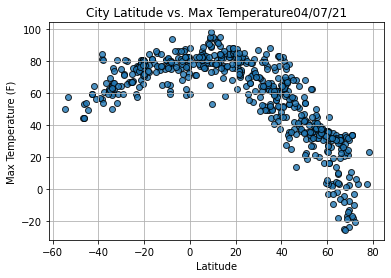

In [94]:
# create a scatter plot of latitude vs max temp
plt.scatter(lats,max_temps, 
            edgecolor='k',linewidth=1,marker="o",alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature" +time.strftime("%x"))
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.show()

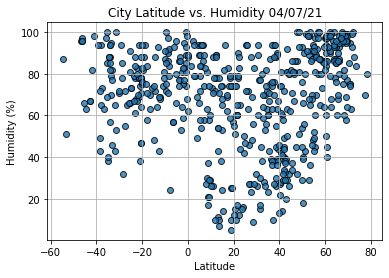

In [95]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

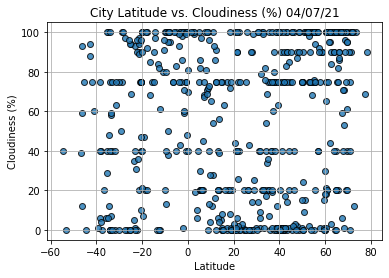

In [96]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

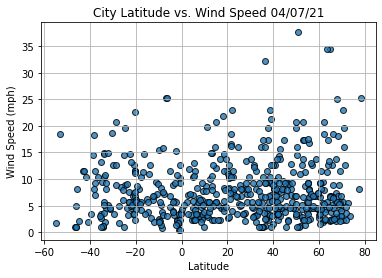

In [97]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()